In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

import yfinance as yf
import pandas_datareader.data as pdr

In [3]:
tech_list = ['AAPL']

yf.pdr_override()

start_date = '10-04-2020'
end_date = '1-12-2021'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo('AAPL', data_source='yahoo', start=start, end=end)
    
company_list = [AAPL]
company_name = ["APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df1 = pd.concat(company_list, axis=0)
df1 = df1.drop('company_name', 1)
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,67.077499,68.425003,66.457497,68.312500,67.472389,131022800
2020-04-14,70.000000,72.062500,69.512497,71.762497,70.879944,194994800
2020-04-15,70.599998,71.582497,70.157501,71.107498,70.233002,131154400
2020-04-16,71.845001,72.050003,70.587502,71.672501,70.791061,157125200
2020-04-17,71.172501,71.737503,69.214996,70.699997,69.830521,215250000
...,...,...,...,...,...,...
2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600
2021-11-26,159.570007,160.449997,156.360001,156.809998,156.809998,76959800


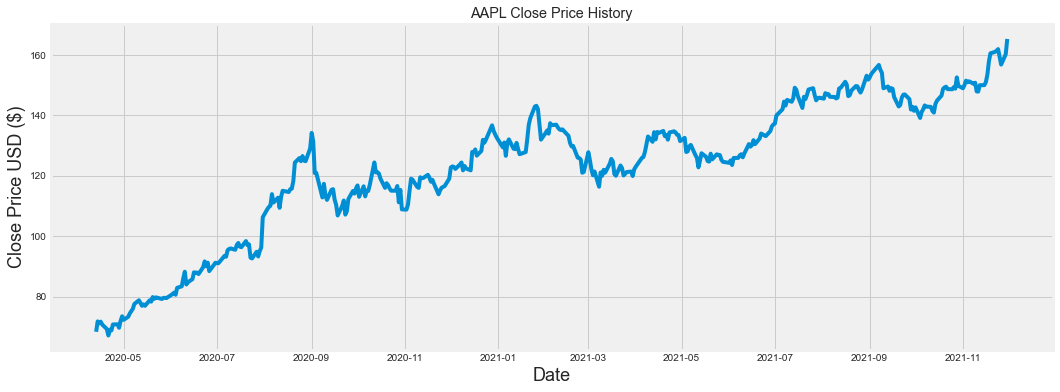

In [4]:
plt.figure(figsize=(16,6))
plt.title('AAPL Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close column 
data = df1.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

373

In [6]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data

In [7]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01242269, 0.04755236, 0.04088282, 0.04663597, 0.03673343,
       0.02179059, 0.        , 0.01967775, 0.01695391, 0.03716622,
       0.03767538, 0.02599086, 0.04928344, 0.06473536, 0.05269458,
       0.0631062 , 0.07430696, 0.08212206, 0.09003893, 0.10630555,
       0.11872824, 0.10956395, 0.09999236, 0.10480363, 0.10014509,
       0.11860091, 0.11396792, 0.1294708 , 0.12341219, 0.12860529,
       0.12310672, 0.12661963, 0.12697605, 0.12618691, 0.13614034,
       0.1399333 , 0.14446452, 0.13733679, 0.16070565, 0.16569507,
       0.19250055, 0.2150294 , 0.17190641, 0.17928872, 0.18995492,
       0.21309469, 0.21184736, 0.21220378, 0.20708704, 0.23037954,
       0.24987908, 0.23340885, 0.24557696, 0.21704047, 0.23778734,
       0.24547511, 0.24371862, 0.24371862, 0.26851311, 0.26556017])]
[0.2876562255530384]

[array([0.01242269, 0.04755236, 0.04088282, 0.04663597, 0.03673343,
       0.02179059, 0.        , 0.01967775, 0.01695391, 0.03716622,
       0.03767538, 0.02599086, 0.049

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
313/313 [==============================] - 8s 19ms/step - loss: 0.0067
Epoch 2/3
313/313 [==============================] - 6s 18ms/step - loss: 0.0028
Epoch 3/3
313/313 [==============================] - 5s 17ms/step - loss: 0.0028


In [9]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions = predictions

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.657197852047409

<ipython-input-10-af49d9aa9436>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions*1.05


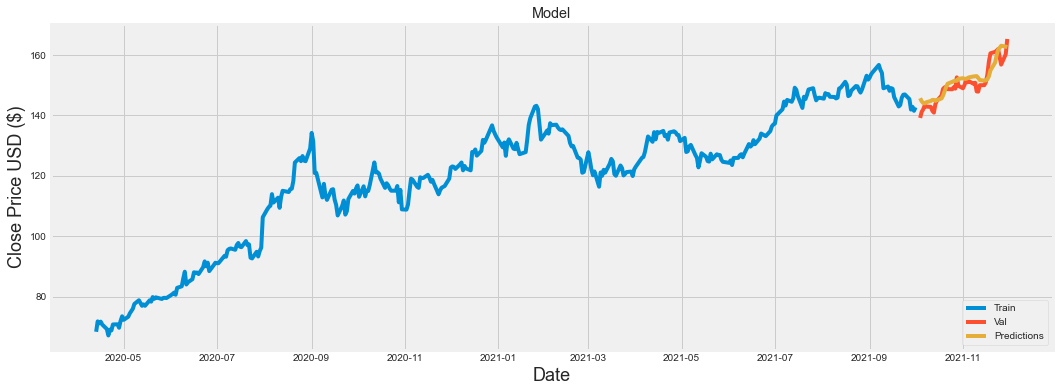

In [10]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [11]:
# Show the valid and predicted prices
valid.head()

,Close,Predictions
Date,,
2021-10-04,139.139999,145.673889
2021-10-05,141.110001,144.667648
2021-10-06,142.000000,144.081879
2021-10-07,143.289993,143.958694
2021-10-08,142.899994,144.327057
